In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [36]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_test.shape

(10000, 28, 28)

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

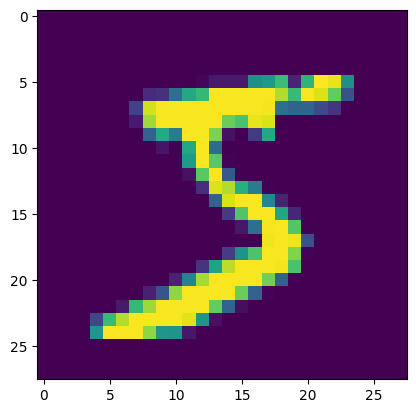

In [40]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [41]:
x_train = x_train/255
x_test = x_test/255

In [42]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [46]:
history = model.fit(x_train,y_train,epochs=25,validation_split = 0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8621 - loss: 0.4814 - val_accuracy: 0.9574 - val_loss: 0.1469
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9638 - loss: 0.1206 - val_accuracy: 0.9656 - val_loss: 0.1184
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9751 - loss: 0.0798 - val_accuracy: 0.9728 - val_loss: 0.0939
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9825 - loss: 0.0559 - val_accuracy: 0.9725 - val_loss: 0.0954
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9864 - loss: 0.0455 - val_accuracy: 0.9710 - val_loss: 0.1006
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9889 - loss: 0.0349 - val_accuracy: 0.9636 - val_loss: 0.1333
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9721 - val_loss: 0.0994
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0231 

In [47]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
y_pred = y_prob.argmax(axis = 1)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.979

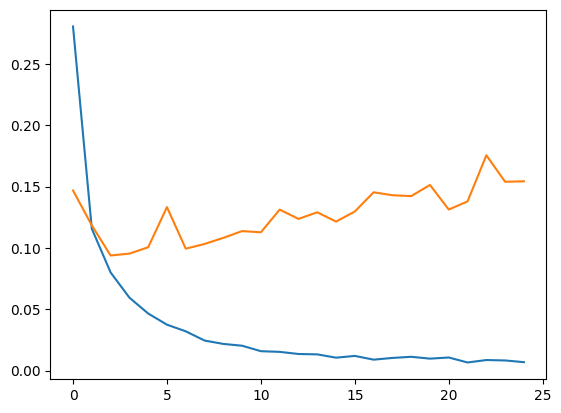

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


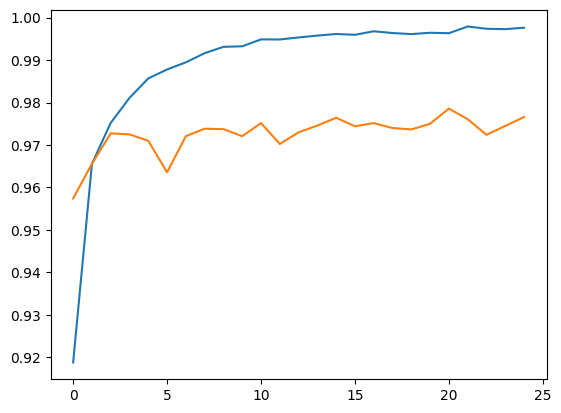

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


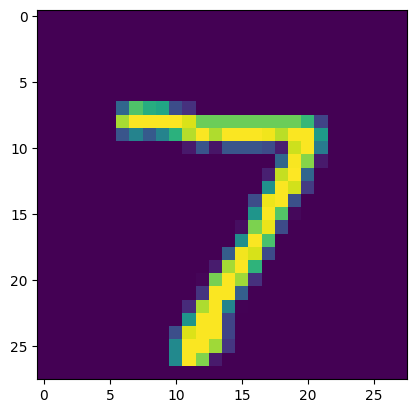

In [52]:
plt.imshow(x_test[0])

In [53]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([7])